In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.318070,69.174262,78.998742
Weight,10000.0,161.440357,32.108439,64.700127,135.818051,161.212928,187.169525,269.989699


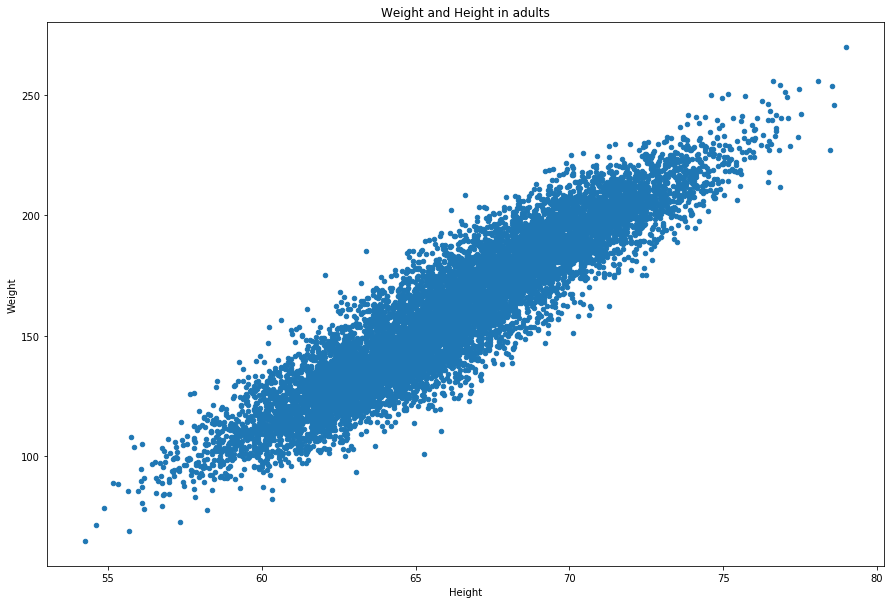

In [9]:
df.plot(kind = 'scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults',
        figsize = (15, 10)
       );

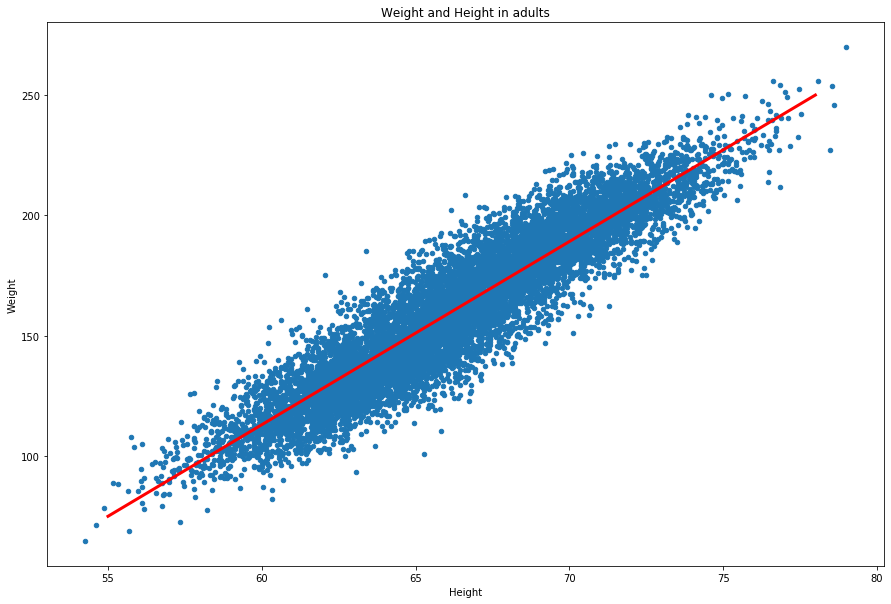

In [35]:
df.plot(kind = 'scatter',
        x = 'Height',
        y = 'Weight',
        title = 'Weight and Height in adults',
        figsize = (15, 10)
       );

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color = 'red', linewidth = 3);

In [13]:
def line(x, w = 0, b = 0):
    return b + w * x

In [14]:
x = np.linspace(55, 80, 100)

x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [17]:
yhat = line(x, w = 0, b = 0)

yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
yhat = line(x, w = 0, b = 1)

yhat

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

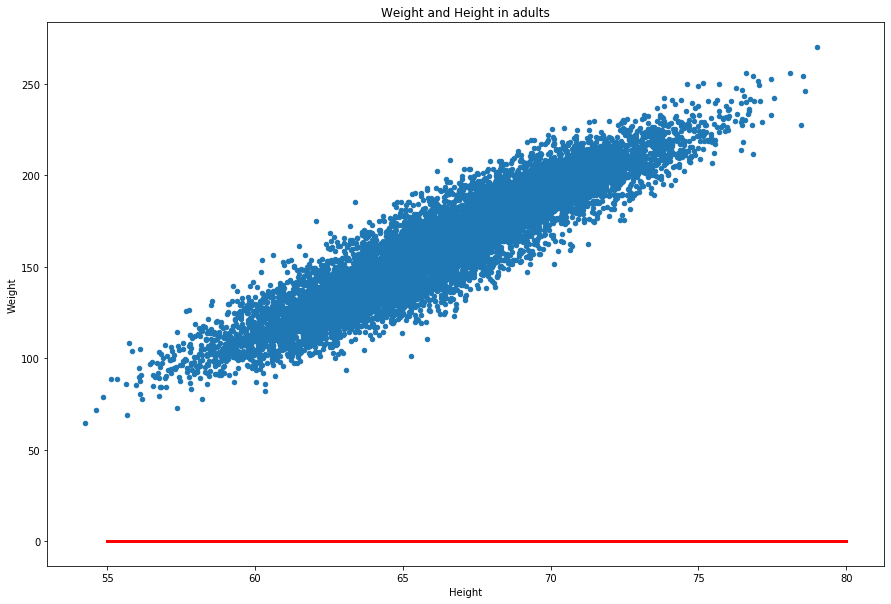

In [18]:
def line(x, w = 0, b = 0):
    return b + w * x

x = np.linspace(55, 80, 100)
yhat = line(x, w = 0, b = 0)

df.plot(kind  = 'scatter',
        x     = 'Height',
        y     = 'Weight',
        title = 'Weight and Height in adults',
        figsize = (15, 10)
       );

plt.plot(x, yhat, color = 'red', linewidth = 3);

# Cost Function

In [20]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return s.mean()

In [30]:
X = df['Height'].values  # array

y_true = df['Weight'].values  # array

In [31]:
df.Weight.values

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [32]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [33]:
y_pred = line(X)

y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

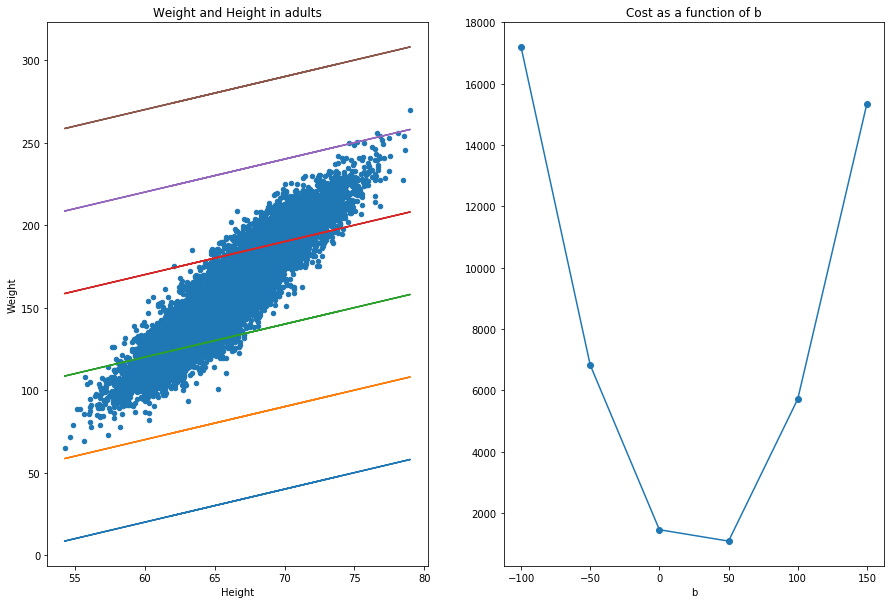

In [36]:
plt.figure(figsize = (15, 10))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)

df.plot(kind  = 'scatter',
        x     = 'Height',
        y     = 'Weight',
        title = 'Weight and Height in adults', 
        ax    = ax1
       );

bbs  = np.array([-100, -50, 0, 50, 100, 150])

mses = [] # we will append the values of the cost here, for each line

X = df['Height'].values  # array

y_true = df['Weight'].values  # array

for b in bbs:
    y_pred = line(X, w = 2, b = b)
    mse    = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

# Linear Regression with Keras

In [44]:
# it's called sequential because we're going to be adding elements
# to these model in a sequence to build a linear regression.
from keras.models import Sequential

# to build a linear regression we only need 'dense' type of layer.
from keras.layers import Dense

# optimizers
from keras.optimizers import Adam, SGD

# these libraries are to be change our bodies of weights and biases.

In [45]:
model = Sequential()

model.add(Dense(1, input_shape = (1, )))

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [47]:
# compiling the model
# it will construct the model using the backend software
# that we define.
# we are using 'tensor flow' as backend.
model.compile(Adam(lr = 0.8), 'mean_squared_error')

model.fit(X, y_true, epochs = 40)

# Keras is exploring different values for w and b
# after these iterations it finds the cost the minimum
# the cost the minimum : the lowest possible

W1019 14:51:28.834304 13408 deprecation_wrapper.py:119] From C:\Users\Sefa3\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1019 14:51:29.002878 13408 deprecation_wrapper.py:119] From C:\Users\Sefa3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1019 14:51:29.348115 13408 deprecation_wrapper.py:119] From C:\Users\Sefa3\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/40
10000/10000 [==============================] - 0s 42us/step - loss: 748.8824
Epoch 2/40
10000/10000 [==============================] - 0s 21us/step - loss: 555.2853
Epoch 3/40
10000/10000 [==============================] - 0s 21us/step - loss: 497.5550
Epoch 4/40
10000/10000 [==============================] - 0s 21us/step - loss: 446.4944
Epoch 5/40
10000/10000 [==============================] - 0s 19us/step - loss: 401.1185
Epoch 6/40
10000/10000 [==============================] - 0s 18us/step - loss: 361.5973
Epoch 7/40
10000/10000 [==============================] - 0s 23us/step - loss: 341.9838
Epoch 8/40
10000/10000 [==============================] - 0s 19us/step - loss: 304.9816
Epoch 9/40
10000/10000 [==============================] - 0s 20us/step - loss: 278.3277
Epoch 10/40
10000/10000 [==============================] - 0s 22us/step - loss: 253.7800
Epoch 11/40
10000/10000 [==============================] - 0s 22us/step - loss: 230.2105
Epoch 12/40
10000/10000 [=====

In [49]:
y_pred = model.predict(X)

y_pred

array([[222.12534],
       [182.9631 ],
       [224.15952],
       ...,
       [144.96985],
       [184.9141 ],
       [130.09589]], dtype=float32)

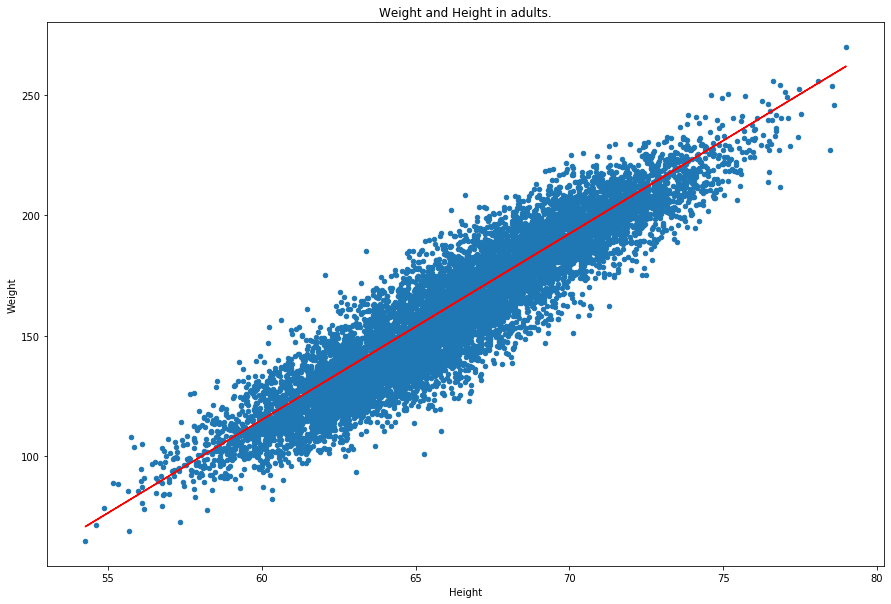

In [51]:
df.plot(kind    = 'scatter',
        x       = 'Height',
        y       = 'Weight',
        title   = 'Weight and Height in adults.',
        figsize = (15, 10)
       );
plt.plot(X, y_pred, color = 'red');

In [53]:
W, B = model.get_weights()

In [55]:
# model only has one weight
# and the slope is 7.731

W

array([[7.7317667]], dtype=float32)

In [56]:
# bias value

B

array([-348.84256], dtype=float32)